In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook')

In [2]:
import curveball

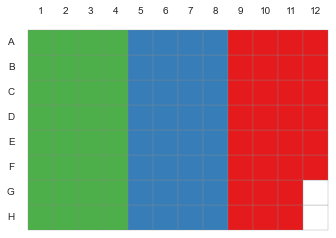

In [3]:
plate = pd.read_csv(r"D:/workspace/curveball_project/python/plate_templates/G-RG-R.csv")
fig,ax = curveball.plots.plot_plate(plate)

['G' 'RG' 'R' '0']


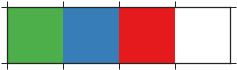

In [4]:
sns.palplot(plate.Color.unique())
print plate.Strain.unique()

In [5]:
filename = "D:/Google Drive/ex silico/tecan/Yoav_08022015_nolag.xlsx"
df = curveball.ioutils.read_tecan_xlsx(filename, ('OD','Green','Red'), max_time=14, plate=plate)

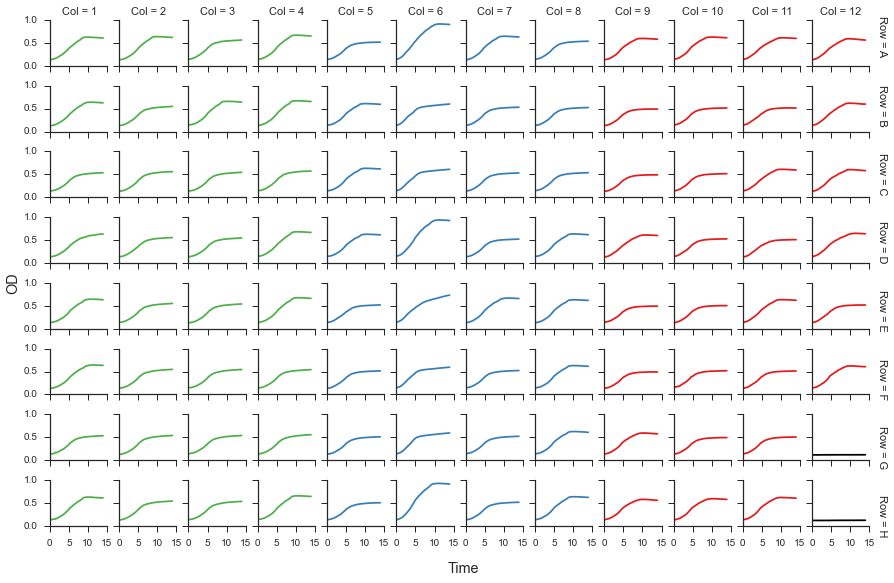

In [6]:
g = curveball.plots.plot_wells(df, 'Time', 'OD')

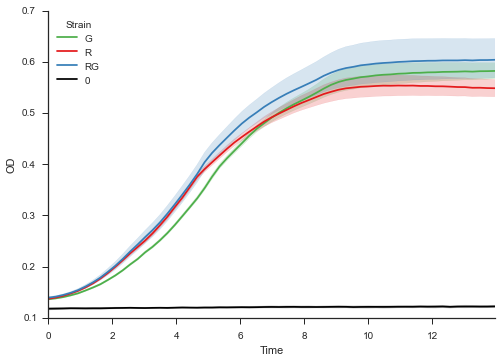

In [7]:
g = curveball.plots.tsplot(df)

[[Model]]
    Model(richards_function)
[[Fit Statistics]]
    # function evals   = 131
    # data points      = 61
    # variables        = 4
    chi-square         = 6.849
    reduced chi-square = 0.120
[[Variables]]
    y0:   0.13134016 +/- 0.000981 (0.75%) (init= 0.1393781)
    r:    0.22009256 +/- 0.005165 (2.35%) (init= 0.07495804)
    K:    0.59420035 +/- 0.008732 (1.47%) (init= 0.604425)
    nu:   5.82807405 +/- 1.405285 (24.11%) (init= 1)



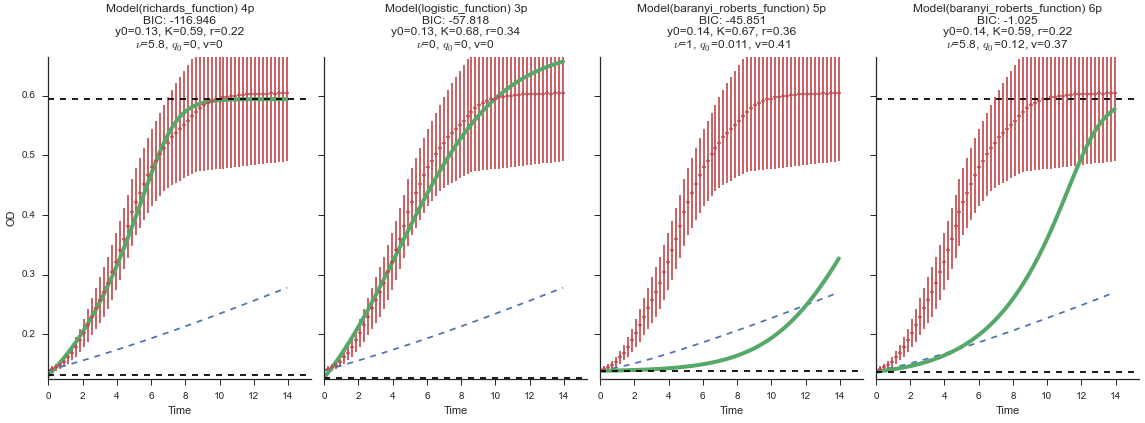

In [8]:
df_RG = df[df.Strain == 'RG']
models_RG,fig,ax = curveball.models.fit_model(df_RG)

# Cook's distance

In [9]:
reload(curveball.models)

<module 'curveball.models' from 'd:\workspace\curveball_project\python\curveball\models.pyc'>

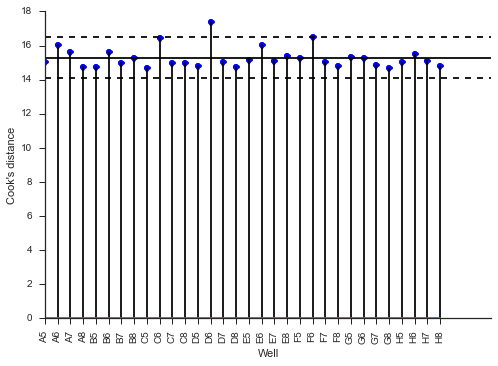

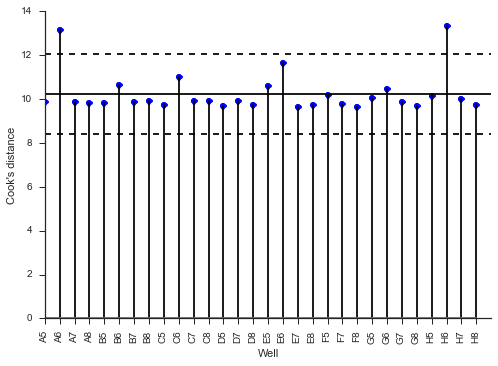

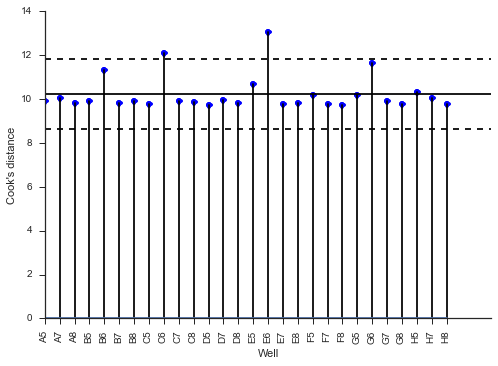

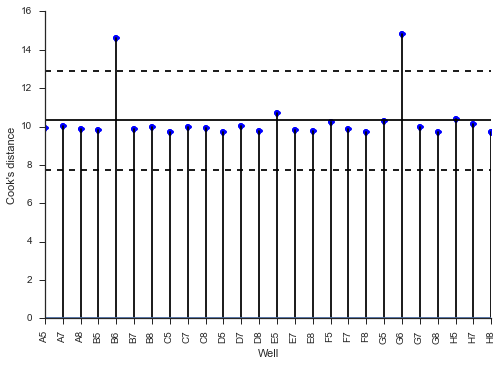

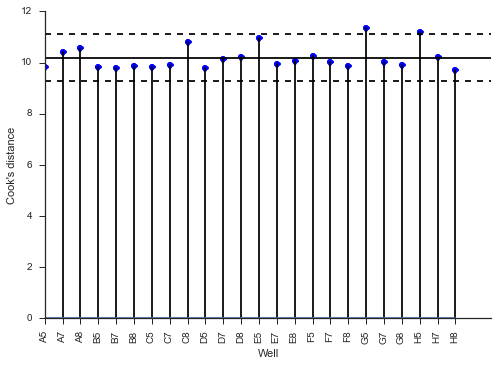

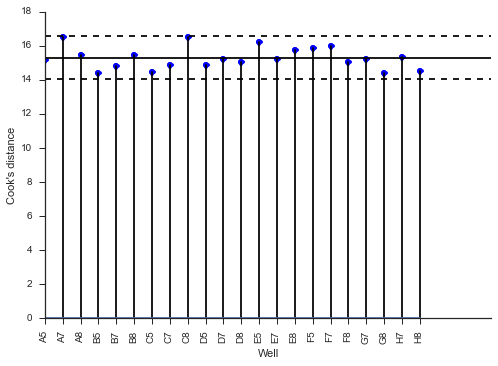

In [10]:
model_fit = curveball.models.fit_model(df_RG, PLOT=False, PRINT=False)[0]
outliers,fig,ax = curveball.models.find_all_outliers(df_RG, model_fit, PLOT=True)

In [11]:
outliers = np.array(outliers).flatten()
print "Outliers:", outliers
original = len(df_RG.Well.unique())
remaining = original - len(outliers)
print "Remaining wells %d out of %d" % (remaining, original)

Outliers: [u'D6' u'F6' u'A6' u'H6' u'C6' u'E6' u'B6' u'G6' u'G5' u'H5']
Remaining wells 22 out of 32


[[Model]]
    Model(richards_function)
[[Fit Statistics]]
    # function evals   = 131
    # data points      = 61
    # variables        = 4
    chi-square         = 6.849
    reduced chi-square = 0.120
[[Variables]]
    y0:   0.13134016 +/- 0.000981 (0.75%) (init= 0.1393781)
    r:    0.22009256 +/- 0.005165 (2.35%) (init= 0.07495804)
    K:    0.59420035 +/- 0.008732 (1.47%) (init= 0.604425)
    nu:   5.82807405 +/- 1.405285 (24.11%) (init= 1)



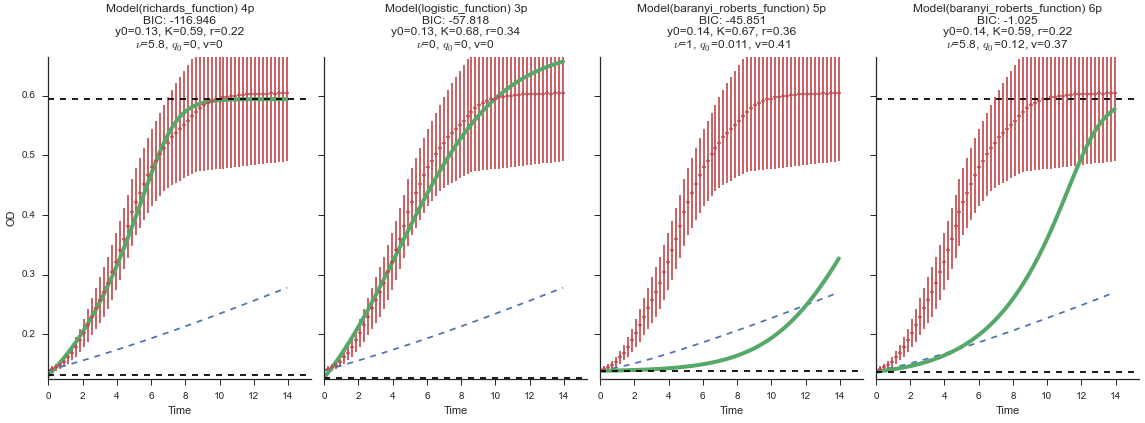

In [12]:
models_RG,fig,ax = curveball.models.fit_model(df_RG)

[[Model]]
    Model(richards_function)
[[Fit Statistics]]
    # function evals   = 126
    # data points      = 61
    # variables        = 4
    chi-square         = 44.432
    reduced chi-square = 0.780
[[Variables]]
    y0:   0.12137256 +/- 0.001300 (1.07%) (init= 0.13835)
    r:    0.22499199 +/- 0.003819 (1.70%) (init= 0.06409473)
    K:    0.55521808 +/- 0.010098 (1.82%) (init= 0.5674773)
    nu:   6.81597527 +/- 1.515918 (22.24%) (init= 1)



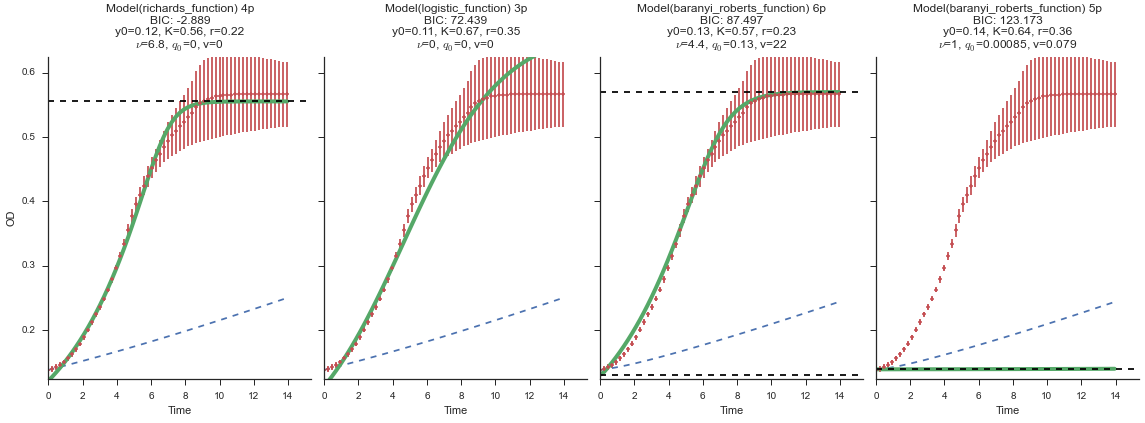

In [13]:
models_RG_clean,fig,ax = curveball.models.fit_model(df_RG[~df_RG.Well.isin(outliers)])

In [19]:
print sorted(outliers)

[u'A6', u'B6', u'C6', u'D6', u'E6', u'F6', u'G5', u'G6', u'H5', u'H6']


[u'D6' u'F6' u'A6' u'H6' u'C6' u'E6' u'B6' u'G6' u'G5' u'H5']


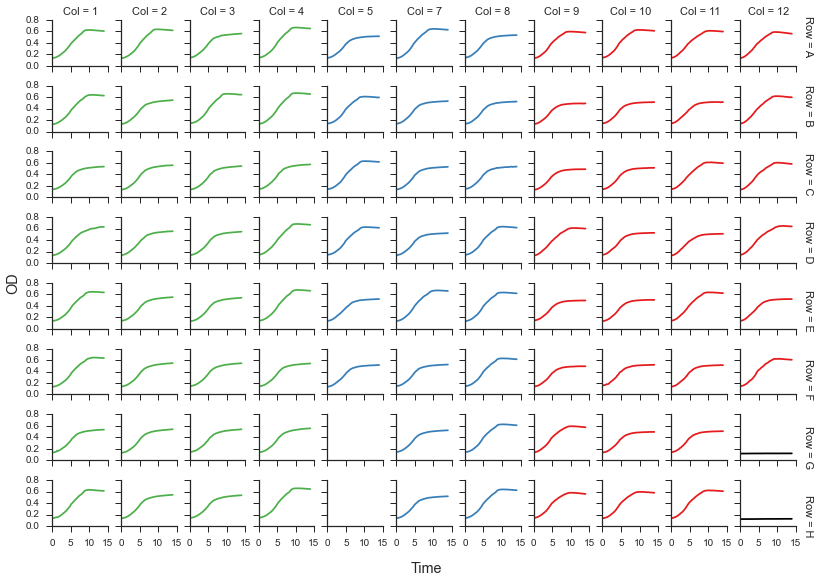

In [17]:
curveball.plots.plot_wells(df[~df.Well.isin(outliers)])

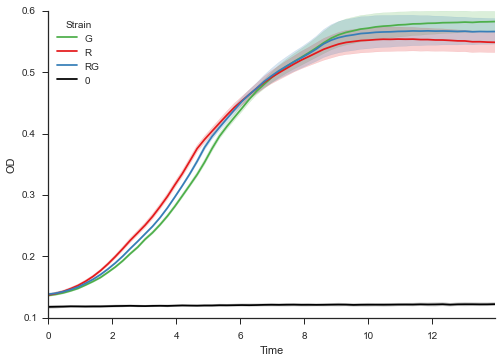

In [15]:
curveball.plots.tsplot(df[~df.Well.isin(outliers)])